In [9]:
# 1. Import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [8]:
# Load the Dataset
url = "D:/ML_PROJECTS/THE-----------LAST------------RUN/Linear_Regression/Linear_Regression_Implementation/data/data_for_lr.csv"
data = pd.read_csv(url)

data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.shape

(700, 2)

In [5]:
data.isna().sum()

x    0
y    1
dtype: int64

In [7]:
# 3. Separate input and Target variables
data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [ ]:
# 4. Build the Linear Regression Model and Plot the regression line
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 12001.113997586173
Iteration = 1, Loss = 1453.14776224983
Iteration = 1, Loss = 182.00304044612437
Iteration = 1, Loss = 28.816267555974985
Iteration = 2, Loss = 10.355593870838522
Iteration = 3, Loss = 8.130881318842263
Iteration = 4, Loss = 7.862778773948921
Iteration = 5, Loss = 7.8304690280885625
Iteration = 6, Loss = 7.826574880613018
Iteration = 7, Loss = 7.826105122027755
Iteration = 8, Loss = 7.826048039617745
Iteration = 9, Loss = 7.826040689225357
Iteration = 10, Loss = 7.8260393321297945
Iteration = 11, Loss = 7.826038697339201
Iteration = 12, Loss = 7.826038149641696
Iteration = 13, Loss = 7.826037612487324
Iteration = 14, Loss = 7.826037076650984
Iteration = 15, Loss = 7.826036541020941
Iteration = 16, Loss = 7.826036005463215
Iteration = 17, Loss = 7.826035469961657
Iteration = 18, Loss = 7.826034934514312
Iteration = 19, Loss = 7.826034399120947
Iteration = 20, Loss = 7.826033863781523


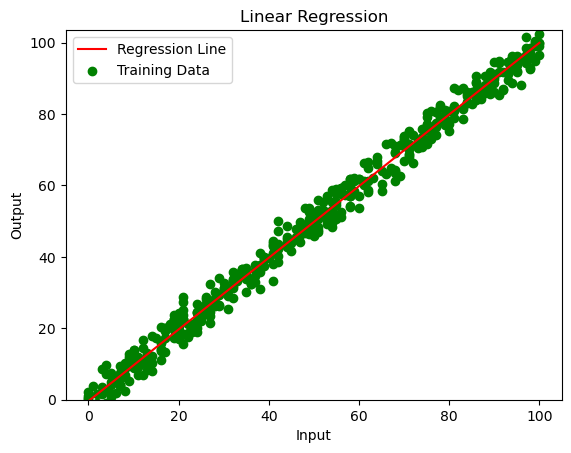

In [11]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
